<a href="https://colab.research.google.com/github/pmalves/coach-report-lv1/blob/main/Dossier_de_Est%C3%A1gio_Pedro_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Initialização

# from pickle import FALSE
# Install the required libraries
# !pip install google-auth-oauthlib==1.2.0 google-auth-httplib2==0.1.1 google-api-python-client==2.116.0

# Import necessary libraries
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from IPython.display import Markdown, display
import re
import google
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# (If you want to use your personal account instead of a service account, use this method. The first time you will be asked to authenticate via Google)
from google.colab import auth
auth.authenticate_user()
creds = google.auth.default()[0]

# Step 2: Get the Google Sheet ID
# Replace with your Google Sheet ID
SPREADSHEET_ID = '1OMSrvA2ZWcH05i2w9FoFw2axjeIf0-3ME5btbbctn0U'

# Step 3: Build Google Sheet Service
service = build('sheets', 'v4', credentials=creds)

# Step 4: Get data from Google Sheet
# Replace 'Sheet1' with the name of the sheet you want to access. You can also specify a range of data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range="'Atletas'!B5:F24").execute()
values = result.get('values')

# Step 5: Create Pandas DataFrame
athletes_data = pd.DataFrame(values[1:], columns=values[0])

# Contextualização


## Treinador

* Nome: Pedro Alves
* Idade: 47 anos

Pratico voleibol há 30 anos, podendo dizer-se que tenho uma folha de resultados exímia! Isto, claro, se por exímia quisermos dizer que essa folha está em branco, sendo que a "carreira" foi inteiramente passada na 3a divisão e no campeonato Inatel. Recentemente, troquei o pavilhão pela praia, já que a carrocaria não apresenta as condições necessárias para jogar em pavilhão. Infelizmente, o talento na areia faz antever que a folha de resultados desportivos ser manterá, como está, imaculada.

A experiência como treinador é praticamente nula; A ideia inicial de _"vem dar uma apoio aos treinos das tuas filhas"_ no intervalo da função inevitável de _Uber-daddy_ transformou-se em _"ah, espera, afinal vais ser treinador das iniciadas"_.

Um mês depois tinha concluído a fase inicial do curso de Treinadores de Grau I e estava responsável por 14 miúdas que jogavam há menos de 6 meses, queriam ser federadas, mas nem servir sabiam.

Como elemento francamente positivo, denoto o aspecto motivacional de que será muito dificilmente serei pior treinador do que fui jogador.


## Clube

![GDUE](https://github.com/pmalves/coach-report-lv1/blob/main/images/gdue-logo.png?raw=true)


O **Grupo Desportivo União Ericeirense (GDUE)** é uma associação desportiva com sede na vila de Ericeira, Portugal. Fundado com o objetivo de promover o desporto e a integração comunitária, o clube oferece uma estrutura organizada para diversas modalidades desportivas, incluindo voleibol. Com forte ligação à comunidade local, o GDUE é reconhecido pelo desenvolvimento de atletas e pela participação em competições regionais e nacionais.

O “sonho” dos promotores desta iniciativa é fazer desta modalidade, o voleibol, a mais praticada no concelho de Mafra e contribuir para o engrandecimento do GDUE e desenvolvimento do desporto e promover de hábitos de vida saudável.
Nesse sentido são objetivos estratégicos o lançamento faseado do voleibol federado, do voleibol não federado e do voleibol “social” em pavilhão e lançar as bases para o “beach volley”. Serão ainda lançadas iniciativas com o objetivo de divulgar a existência da modalidade e atrair novos praticantes.


Em 2024 foram inscritas as seguintes equipas na AVL:

* Júniores (Fem)
* Cadetes (Fem)
* Iniciadas (Fem)
* Minis (Fem)

## Estrutura Logística

![Escola da Carvoeira](https://github.com/pmalves/coach-report-lv1/blob/main/images/carvoeira.jpg?raw=true)


Os treinos e jogos são feitos no pavilhão da Escola EB1/JI da Freguesia da Carvoeira.

Como apanágio em Portugal para todos os clubes que estão a iniciar, foram-nos dadas todas as condições ideais para a prática e... estava a brincar. O pavilhão da escola é pequeno, apenas com espaço para uma rede, e foi-nos atribuído um número reduzidíssimo de horários para distribuir pelas 4 equipas.

Na maior parte dos dias, um tempo de treino de 90 minutos inclui apenas 60 minutos de rede, sendo que nos últimos 30 minutos do treino já está outra equipa em aquecimento.

Toda a estrutura do treino teve de ser adaptada a estas condições.

## Campeonato

O Ericeirence encontra-se a disputar o [Campeonato Regional de Iniciados Femininos, Divisão B, 1a Fase](https://www.avlisboa.pt/competi%C3%A7%C3%B5es/campeonatos-regionais/campeonatos-regionais-2024-20245/table/250-1a-fase-camp-nacional-camp-regionais-2024-2025-iniciados-femininos-divisao-b-1a-fase.html). Poderia extender-me na descrição dos enormíssimos benifícios pessoais, profissionais e sócio-económicos que advêm da participação naquele que é provavelmente o evento desportivo mais bem organizado do planeta, mas como muito possivelmente isto vai ser lido por pessoas da AVL, tenho receio que a minha capacidade linguística não esteja à altura, pelo que não vou nem tentar.


## Atletas

Segue-se uma descrição sobre o perfil e distribuição das atletas.


In [ ]:
# @title Listagem
test_name = ""

# Some cleaning - Convert 'Nr' and 'Data Nascimento' column to numeric, handling errors by coercing to NaN and filling with 0
athletes_data['Nr'] = pd.to_numeric(athletes_data['Nr'], errors='coerce').fillna(0).astype(int)
athletes_data['Data Nascimento'] = pd.to_numeric(athletes_data['Data Nascimento'], errors='coerce').fillna(0).astype(int)

athletes_table = athletes_data[['Nr', 'Atleta', 'Posição','Data Nascimento']].sort_values(by='Nr')

athletes_table_md = athletes_table.to_markdown(index=False)

total_athletes = len(athletes_data)

# Calculate number of athletes per 'Data Nascimento'
athletes_per_birthdate = athletes_data.groupby('Data Nascimento',).size()

# Step 5: Calculate number of athletes per 'Posição'
athletes_per_position = athletes_data.groupby('Posição').size()

# Step 6: Create formatted Markdown string
athletes_description_md = f"""

### Tabela de Atletas ({len(athletes_data)} atletas)

{athletes_table_md}


"""

display(Markdown(athletes_description_md))




### Tabela de Atletas (17 atletas)

|   Nr | Atleta            | Posição   |   Data Nascimento |
|-----:|:------------------|:----------|------------------:|
|    3 | Inês              | Passadora |              2010 |
|   10 | Leonor Ferreira   | Entrada   |              2010 |
|   11 | Sofia             | Central   |              2011 |
|   12 | Pietra            | Saída     |              2012 |
|   13 | Matilde           | Entrada   |              2010 |
|   14 | Carolina Antunes  | Passadora |              2011 |
|   17 | Salomé            | Entrada   |              2010 |
|   18 | Maria N           | Central   |              2010 |
|   19 | Lia               | Central   |              2011 |
|   20 | Beatriz           | Entrada   |              2010 |
|   24 | Alice Alves       | Saída     |              2010 |
|   25 | Emilia            | Central   |              2011 |
|   26 | Alice Simões      | Saída     |              2010 |
|   28 | Leonor Anjos      | Entrada   |              2010 |
|   31 | Mafalda           | Saída     |              2011 |
|   32 | Ema               | Entrada   |              2010 |
|   86 | Carolina Ferreira | Central   |              2010 |




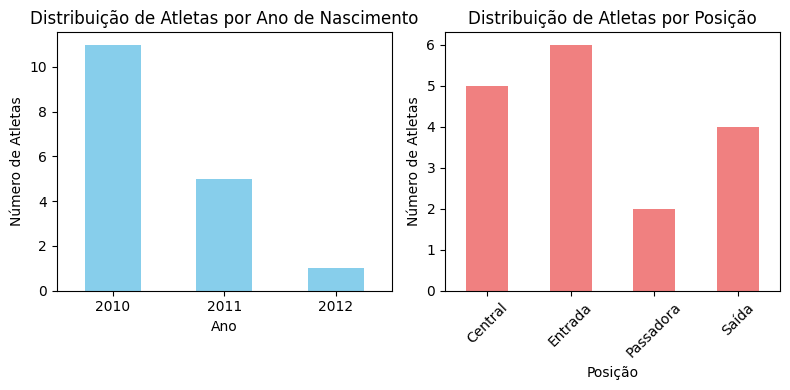

In [ ]:
#@title Distribuição por Ano de Nascimento e Posição

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

athletes_per_birthdate.plot(kind='bar', color='skyblue', ax=ax[0]); # Generate the chart
ax[0].set_title('Distribuição de Atletas por Ano de Nascimento') # Set the title
ax[0].set_xlabel('Ano') # Set x-axis label
ax[0].set_ylabel('Número de Atletas') # Set y-axis label
ax[0].tick_params(axis='x', rotation=0, labelrotation=0) # Rotates labels on the x axis

# Overlaying the normal distribution curve
birth_years = athletes_per_birthdate.index.to_numpy()

mean_birth_year = np.mean(birth_years)
std_birth_year = np.std(birth_years)

# Generate x values for the normal distribution curve, with some padding for better visualization
x = np.linspace(birth_years.min() - 1, birth_years.max() + 1, 50)
y = norm.pdf(x, mean_birth_year, std_birth_year)

# Scale the normal distribution curve to the bar chart's y-axis values, with some padding
y_scaled = y * athletes_per_birthdate.max() * 2


ax[0].plot(x, y_scaled, color='red', label='Normal Distribution', linestyle='--')
# ax[0].legend()

# # Step 6: Create position chart
athletes_per_position.plot(kind='bar', color='lightcoral', ax=ax[1]); # Generate the chart
ax[1].set_title('Distribuição de Atletas por Posição') # Set the title
ax[1].set_xlabel('Posição') # Set x-axis label
ax[1].set_ylabel('Número de Atletas') # Set y-axis label
ax[1].tick_params(axis='x', rotation=45, labelrotation=45 ) # Rotates labels on the x axis

plt.tight_layout(); # Adjust the layout to fit everything in the chart
plt.show()


De notar que a indicação sobre posições não é de todo vinculativa, e tem mudado com o tempo. Essa indicação é apenas útil para fazer o planemento dos jogos e das formações.

# Treinos: Filosofia e Abordagem


## Contexto

O Ericeirense contou com a inscrição de um elevado número de atletas dos anos 2009 a 2011 - aproximadamente 35 atletas. Tomou-se a decisão de criar duas equipas:

* Uma equipa de cadetes, com as atletas de 2009 e as mais experientes de 2010

* Uma equipa de iniciadas, com as menos experientes de 2010 e as de 2011

Neste contexto, com atletas que nunca tiveram qualquer contacto com a competição e com menos de 6 meses de voleibol, o foco está claramente na formação e não nos resultados.


## Filosofia de treino e jogo

Aqui estão alguns dos principais fundamentos que regem a filosofia dos treinos. Sou o primeiro a admitir que com mais experiência alguns destes possam mudar, mas é o ponto de partida que utilizei.


> _Apostar nos fundamentos_

Estas recém-atletas vêm ou com lacunas técnicas ou já com vícios que se tornam difíceis de tirar. Desde fazerem a plataforma com a mão aberta a [não] fazer a chamada com os braços no ar, a evolução só acontece com muita correção e muita prática.

A última coisa que queremos são atletas que só quase aos 50 anos é que tentam aprender a fazer um passe, como um certo central que me vem à memória assim de repente.

> _Desenvolvimento individual acima do resultado desportivo_

O meu objectivo é que as miúdas aprendam a jogar voleibol. Um exemplo que lhes dou e que me parece representativo: Prefiro que elas falhem um remate do que acertem um passe para o outro lado da rede ao terceiro toque.

No longo prazo podemos perder muitos pontos mas ganhamos jogadoras.


> _Maior aposta na componente técnica do que na componente tática_

Não considero a componente tática nesta fase uma prioridade, quando comparado com a componente técnica. A principal razão é a seguinte: quando treinamos componente tática, pela natureza do trabalho,[normalmente] temos apenas uma bola no ar para 12-14 jogadoras.

Ora, o que elas precisam nesta fase é contacto com a bola. O meu objectivo é, em cada excercício, ter o maior número possível de bolas no ar, com campo dividido em 2, 3 ou em formatos mais dinâmicos como _King of the Court_.

O ponto principal para praticar a componente táctica... são os próprios jogos. Nesta fase claramente encaro os jogos como um $4^o$ treino semanal.


> _Implementar modelos de jogo avançados_

Este fundamento pode parecer um contra-senso em relação ao anterior, mas passo a explicar; Com tempo limitado para a parte tática, a minha opção foi a de "curto-cirtuitar" modelos táticos intermédios. Passei todos os modelos de jogo "temporários" (6-0, 4-2, outras variantes), e em 5 semanas coloquei a equipa a jogar no modelo de 5-1.

Durante o curso de treinadores de nível I, o Professor Jorge Infante referiu algo que fez sentido para mim na altura: _"Não faz sentido evoluir do sistema 6-0 enquanto a equipa não conseguir colocar a receção no sítio certo"_. No entanto, optei por uma abordagem diferente: Coloquei as miúdas a aprender as trocas, penetrações e movimentos para jogar em 5-1. Elas podem não conseguir colocar uma receção no sítio... mas quando conseguirem, as peças vão encaixar no sítio e já saberão o que fazer.

Esta opção é também resultado de experiência pessoal. Quando jogava nos iniciados/juvenis do Benfica, no distante ano de 1783, tínhamos uma equipa tecnicamente avançada, e jogávamos várias vezes contra uma equipa do Sporting que metia medo no ataque à rede, mas como não davam uma para a caixa na receção e na defesa, levavam consistentemente 3-0. O problema foi que eles eventualmente aprenderam a receber e a defender; toda a nossa vantagem se desvaneceu, deixamos de lhes conseguir ganhar e eventualmente essa equipa conseguiu um título nacional.

Daí a opção de avançar rapidamente pelos diferentes modelos:

* Primeiro jogo foi em 6-0
* Segundo jogo foi em 4-2 símples apenas com transição do distribuidor para a zona 3
* Terceiro jogo em 4-2 símples com transição dos defesas para as posições deles (entradas na 6, centrais na 5, passador na 1). De notar que nesta altura as jogadoras ainda não sabiam que já estavam a se preparar para fazer posições fixas
* Quarto jogo em 4-2 símples com posições fixas
* Quinto e seguintes em 5-1

Dois pontos que se tornaram claros para mim durante este perído:

* Quem faz isto de olhos fechados há 30 anos já se esqueceu o quão complexo isto é para quem nunca fez isto.
* Depois de uns períodos absolutamente caóticos com as miúdas a fazer reboot no meio dos pontos, foi impressionante ver, que quando as coisas "encaixaram", a facilidade com que elas agora fazem as coisas.

Estamos neste momento estamos a jogar em 5-1 com passador na 3 (sendo que a central joga ou na 3 ou na 2 consoante a posição do passador), e assim continuaremos até as miúda terem força para por um passe da 2 para a 4.


> _Generalização em treinos, especialização em jogos_

Este axioma veio no decorrer de algumas semanas de treinos e jogos. Inicialmente estava contra qualquer tipo de especialização precoce, e apesar de ainda ser um princípio que sigo, a minha abordagem é agora um pouco menos restritiva.

**Em treino**, e como referido, há uma aposta maior sobre a componente técnica. Aí, todas as atletas passam por todas as fases de jogo: Serviço, receção, passe, ataque, defesa e bloco (mesmo quem tem $1.20m$ e não chega à rede... afinal, pode ser que crescam)

**Em jogo**, tiro partido das mais-valias que cada atleta dá no seu percurso de desenvolvimento. Como exemplo, a receção é assegurada pricipalmente pelas jogadoras de entrada, apoadas pelo oposto, e os centrais recebem principalmente bolas curtas em passe; O ataque é conduzido principalemente por quem ataca melhor (trabalhando a leitura de jogo da distribuidora); a actual distribuidora principal, que tem umas mãozinhas que parece a reincarnação do Miguel Maia num corpo de meio metro, joga na zona 3, não bloca em jogo e proteje os _amorties_ atrás das blocadoras em 2 e 4.

Tenho chegado à conclusão que esta abordagem híbrida é a mais adequada: não só não limita o desenvolvimento geral das atletas (apoiado no trabalho feito na componente técnica do jogo) como tira partido do melhor que cada atleta tem para oferecer na altura, permitindo melhores resultados desportivos.


> _A todos os atletas é dada igual oportunidade... em treino_


Nos primeiros jogos tinha como abordagem dar sempre tempo a todos os atletas em campo durante um jogo. Tentava sempre que todos jogassem pelo menos um set (dada a restrição de haver apenas uma substituição, algo que, e permitam-me uma análise de comentador desportivo, não lembra nem ao diabo). Contudo, e dado que algumas das atletas não asseguravam os básicos, ista tinha como resultado que em algumas formações os resultados se apresentassem ainda mais desnivelados que o habitual, o que tinha um elevado custo a nível da moral do grupo e até da própria integração das atletas mais fracas no grupo de trabalho. Em resumo, esta abordagem fazia mais "mal que bem".

Passei a adotar um discuso diferente com as atletas; gosto muito dos exercícios em _sobe e desce_, onde após um certo tempo, quem executa melhor os desafios propostos "sobe" para o campo mais competitivo, e quem tem menos sucesso "desce". Sou sempre muito claro com elas ao referir que quem passa mas tempo nos campos "altos" vai ter mais tempo de jogo, e que é ali que elas têm de se desafiar.

Manter um nível de empenho e competitividade alto em todos os treinos é provavelmente o aspeto mais desgastante de quem tem um grupo de adolescentes à frente. Gostaria inclusivé de deixar a sugestão à AVL/FPV para a [re]introdução de violência física para com as atletas!


## Tempos e estrutura de treinos
*(Detalhe a organização dos treinos, como a divisão de tempo: 90’ + 30’.)*



## A componente de praia
*(Discussão sobre a inclusão de treinos de praia no programa.)*


# Aplicação e Evolução


## Mesociclos
*(Descreva como os treinos foram organizados em mesociclos.)*



## Resultados


### Jogos
*(Apresente os resultados dos jogos com gráficos ou tabelas.)*

### Vídeos
*(Links para vídeos relevantes dos jogos ou treinos.)*



### Estatísticas
*(Inclua gráficos e tabelas detalhando as estatísticas dos atletas ou equipes.)*

## Interpretação Pessoal
*(Análise pessoal dos resultados obtidos e evolução observada.)*


# Gestão e Motivação de Atletas


## Comunicação
### Atletas
*(Detalhes sobre como a comunicação é realizada com os atletas.)*

### Pais
*(Discussão sobre a comunicação com os pais e responsáveis.)*



## Presenças
*(Controle e análise das presenças dos atletas nos treinos.)*



## Inquéritos de Satisfação
*(Resultados e análise dos inquéritos realizados com atletas e pais.)*


# Apêndice


## Planos de treino
*(Anexar planos de treino detalhados como tabelas ou links para documentos.)*
